The "Broken" Weather Station
Background: A mountain weather station has been offline for months and recently sent a burst of messy data. Before we can use the data and connect it to streamflow, it must be repaired and the Pandas toolkit can support this.

Task 1: The Raw Feed
Load the .csv of rainfall values and convert into a Pandas DataFrame named Rainfall_mm. The data can be found here:

data/snotel_rainfall_data.csv

Check your work: Use .head() and .describe(). Does the data look right?

In [1]:
import pandas as pd

# The "Broken" Weather Station

Background: A mountain weather station has been offline for months and recently sent a burst of messy data. Before we can use the data and connect it to streamflow, it must be repaired and the Pandas toolkit can support this.

## Task 1: The Raw Feed 
Load the .csv of rainfall values and convert into a Pandas DataFrame named Rainfall_mm. The data can be found here:

```data/snotel_rainfall_data.csv```

Check your work: Use .head() and .describe(). Does the data look right?


In [2]:
# Load rainfall data
Rainfall_mm = pd.read_csv("data/snotel_rainfall_data.csv") # Load the dataset

Rainfall_mm.head(3)

Rainfall_mm.describe()

,Date,Precip_in
count,61,58
unique,60,32
top,2024-01-16,0.0
freq,2,27


In [3]:
Rainfall_mm.head(20)

,Date,Precip_in
0,2024-01-01,0.14028030062619642
1,2024-01-02,0.6590180328421851
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,0.3757291395473922
5,2024-01-06,0.0
6,2024-01-07,1.0954577625968716
7,2024-01-08,0.0
8,2024-01-09,0.0
9,2024-01-10,0.18657649912973773


## Task 2: Using Pandas Tools to make the data readable

**coerce** turns anything it can't read as a number (like 'T' or 'error') into NaN


```df['colname'] = pd.to_numeric(df['colname'], errors='coerce')```

Apply this to your dataset and then try .describe()

In [23]:
Rainfall_mm['Precip_in'] = pd.to_numeric(Rainfall_mm['Precip_in'], errors='coerce') 
Rainfall_mm.describe()



,Precip_in
count,56.000000
mean,-8.467089
std,150.395286
min,-999.000000
25%,0.000000
50%,0.050563
75%,0.682890
max,500.000000


## Task 3: Load the discharge data

Load the .csv of rainfall values and convert into a Pandas Dataframe named streamflow_cfs. The data can be found here:

```data/streamflow_data.csv```

Check your work: Use .head() and .describe(). Does the data look right? How can you extract more useful statistics? Show this.

In [ ]:
streamflow = pd.read_csv("data/streamflow_data.csv")
streamflow['Streamflow_cfs'] = pd.to_numeric(streamflow['Streamflow_cfs'], errors='coerce') 
streamflow.describe()



,Date,Streamflow_cfs
0,2024-01-01,10.25
1,2024-01-02,10.70
2,2024-01-03,13.30
3,2024-01-04,10.10
4,2024-01-05,10.00
5,2024-01-06,11.90
6,2024-01-07,10.00
7,2024-01-08,15.50
8,2024-01-09,10.15
9,2024-01-10,10.45


## Task 4: Clean and repair the data

The sensor cut out during the storm and we now have NaN **AND** -999 values. This prevents us from plotting or otherwise using the time series. Are there any other values we should remove?

Explore different methods and select one that fits the data.

Explore .dropna() (delete the gap), .fillna() with the mean, and .interpolate() for a smoother hydrograph for both datasets.

Note, it may be useful to create a new Pandas DataFrame to compare differences. 

In [6]:
# for the rainfall replace values less than 0 and greater than 20 with NaN
Rainfall_mm_cleaned = Rainfall_mm.copy()
Rainfall_mm_cleaned['Precip_in'] = Rainfall_mm_cleaned['Precip_in'].apply(lambda x: x if 0 <= x <= 20 else pd.NA)
# remove NaN values from the rainfall data calling it Rainfall_mm_removed
Rainfall_mm_removed = Rainfall_mm_cleaned.dropna(subset=['Precip_in'])
Rainfall_mm_removed.head(20)




,Date,Precip_in
0,2024-01-01,0.14028
1,2024-01-02,0.659018
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,0.375729
5,2024-01-06,0.0
6,2024-01-07,1.095458
7,2024-01-08,0.0
8,2024-01-09,0.0
9,2024-01-10,0.186576


In [7]:
# for streamflow data replace values less than 0 and greater than 1000 with NaN
streamflow_cfs_cleaned = streamflow.copy()
streamflow_cfs_cleaned['Streamflow_cfs'] = streamflow_cfs_cleaned['Streamflow_cfs'].apply(lambda x: x if 0 <= x <= 1000 else pd.NA)

# remove NaN values from the streamflow data calling it streamflow_cfs_removed
streamflow_cfs_removed = streamflow_cfs_cleaned.dropna(subset=['Streamflow_cfs'])
streamflow_cfs_cleaned.head(20)

,Date,Streamflow_cfs
0,2024-01-01,10.25
1,2024-01-02,10.7
2,2024-01-03,13.3
3,2024-01-04,10.1
4,2024-01-05,10.0
5,2024-01-06,11.9
6,2024-01-07,10.0
7,2024-01-08,15.5
8,2024-01-09,10.15
9,2024-01-10,10.45


In [8]:
# replace NaN values with the mean of the column for streamflow data
streamflow_cfs_filled = streamflow_cfs_cleaned.copy()
streamflow_cfs_filled['Streamflow_cfs'] = streamflow_cfs_filled['Streamflow_cfs'].fillna(streamflow_cfs_filled['Streamflow_cfs'].mean())
streamflow_cfs_filled.head(20)

/scratch/local/u1589214/865469/ipykernel_2864645/3262729854.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  streamflow_cfs_filled['Streamflow_cfs'] = streamflow_cfs_filled['Streamflow_cfs'].fillna(streamflow_cfs_filled['Streamflow_cfs'].mean())


,Date,Streamflow_cfs
0,2024-01-01,10.250000
1,2024-01-02,10.700000
2,2024-01-03,13.300000
3,2024-01-04,10.100000
4,2024-01-05,10.000000
5,2024-01-06,11.900000
6,2024-01-07,10.000000
7,2024-01-08,15.500000
8,2024-01-09,10.150000
9,2024-01-10,10.450000


In [9]:
# replace NaN values with interpolated values for streamflow data using .interpolate()
streamflow_cfs_interpolated = streamflow_cfs_cleaned.copy()
streamflow_cfs_interpolated['Streamflow_cfs'] = streamflow_cfs_interpolated['Streamflow_cfs'].interpolate(method='linear')
streamflow_cfs_interpolated.head(20)    

/scratch/local/u1589214/865469/ipykernel_2864645/2901000763.py:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  streamflow_cfs_interpolated['Streamflow_cfs'] = streamflow_cfs_interpolated['Streamflow_cfs'].interpolate(method='linear')


,Date,Streamflow_cfs
0,2024-01-01,10.25
1,2024-01-02,10.7
2,2024-01-03,13.3
3,2024-01-04,10.1
4,2024-01-05,10.0
5,2024-01-06,11.9
6,2024-01-07,10.0
7,2024-01-08,15.5
8,2024-01-09,10.15
9,2024-01-10,10.45


In [11]:
#remove NaN and -999 and greater than 20 values from the precipitation data
Rainfall_mm_cleaned = Rainfall_mm[(Rainfall_mm['Precip_in'] >= 0) & (Rainfall_mm['Precip_in'] <= 20) & (Rainfall_mm['Precip_in'] != -999)            & (Rainfall_mm['Precip_in'].notna())]
Rainfall_mm_cleaned.describe() 
# create a data set replacing the removed values with the mean of the column
Rainfall_mm_filled = Rainfall_mm_cleaned.copy()
Rainfall_mm_filled['Precip_in'] = Rainfall_mm_filled['Precip_in'].replace(-999, Rainfall_mm_filled['Precip_in'].mean())
Rainfall_mm_filled['Precip_in'] = Rainfall_mm_filled['Precip_in'].fillna(Rainfall_mm_filled['Precip_in'].mean())
Rainfall_mm_filled.describe()        
# create a data set replacing the removed values with interpolated values
Rainfall_mm_interpolated = Rainfall_mm_cleaned.copy()
Rainfall_mm_interpolated['Precip_in'] = Rainfall_mm_interpolated['Precip_in'].fillna(Rainfall_mm_interpolated['Precip_in'].interpolate(method='linear')) 
Rainfall_mm_interpolated.describe()

# find and remove one duplicate date in the rainfall data
duplicate_dates = Rainfall_mm_interpolated[Rainfall_mm_interpolated.duplicated(subset='Date', keep=False)]
print(duplicate_dates)
Rainfall_mm_interpolated = Rainfall_mm_interpolated.drop_duplicates(subset='Date', keep='first')
Rainfall_mm_interpolated.describe() 

          Date  Precip_in
15  2024-01-16        0.0
16  2024-01-16        0.0


,Precip_in
count,53.000000
mean,0.468736
std,0.795391
min,0.000000
25%,0.000000
50%,0.101126
75%,0.659018
max,3.609354


## Task 5: Join Pandas DataFrames

We often want to relate data to another, and having all the data in once centralized data frame supports this comparison. Create a new Pandas DataFrame named:
* rainfall_methods fill it with the three rainfall dataframes we cleaned
* streamflow_methods and fill it with the three streamflow dataframes we cleaned


In [12]:
#create merged data set of streamflow_cfs cleaned, streamfall_cfs filled, and streamflow_cfs interpolated with date as the index
streamflow_methods = pd.DataFrame({
    'Streamflow_cfs_cleaned': streamflow_cfs_cleaned['Streamflow_cfs'],
    'Streamflow_cfs_filled': streamflow_cfs_filled['Streamflow_cfs'],
    'Streamflow_cfs_interpolated': streamflow_cfs_interpolated['Streamflow_cfs']
})
streamflow_methods.head()  
# set date as the index
streamflow_methods.index = streamflow_cfs_cleaned['Date']
streamflow_methods.head(200)



,Streamflow_cfs_cleaned,Streamflow_cfs_filled,Streamflow_cfs_interpolated
Date,,,
2024-01-01,10.25,10.250000,10.25
2024-01-02,10.7,10.700000,10.7
2024-01-03,13.3,13.300000,13.3
2024-01-04,10.1,10.100000,10.1
2024-01-05,10.0,10.000000,10.0
2024-01-06,11.9,11.900000,11.9
2024-01-07,10.0,10.000000,10.0
2024-01-08,15.5,15.500000,15.5
2024-01-09,10.15,10.150000,10.15


In [13]:
# create a data set with the cleaned, filled, and interpolated rainfall data
rainfall_methods = pd.DataFrame({
    'Precip_in_cleaned': Rainfall_mm_cleaned['Precip_in'],
    'Precip_in_filled': Rainfall_mm_filled['Precip_in'],
    'Precip_in_interpolated': Rainfall_mm_interpolated['Precip_in']
})
rainfall_methods.head()

# set date as the index
rainfall_methods.index = Rainfall_mm_cleaned['Date']
rainfall_methods.head(20)


,Precip_in_cleaned,Precip_in_filled,Precip_in_interpolated
Date,,,
2024-01-01,0.140280,0.140280,0.140280
2024-01-02,0.659018,0.659018,0.659018
2024-01-03,0.000000,0.000000,0.000000
2024-01-04,0.000000,0.000000,0.000000
2024-01-05,0.375729,0.375729,0.375729
2024-01-06,0.000000,0.000000,0.000000
2024-01-07,1.095458,1.095458,1.095458
2024-01-08,0.000000,0.000000,0.000000
2024-01-09,0.000000,0.000000,0.000000


## Task 6: Plot the rainfall and streamflow data to visualize trends and relationships.

Use Pandas simple plotting functionality to separately plot the two dataframes. Which interpolation method do you like? 

<Axes: title={'center': 'Precipitation Data with Different Methods'}, xlabel='Date', ylabel='Precipitation (inches)'>

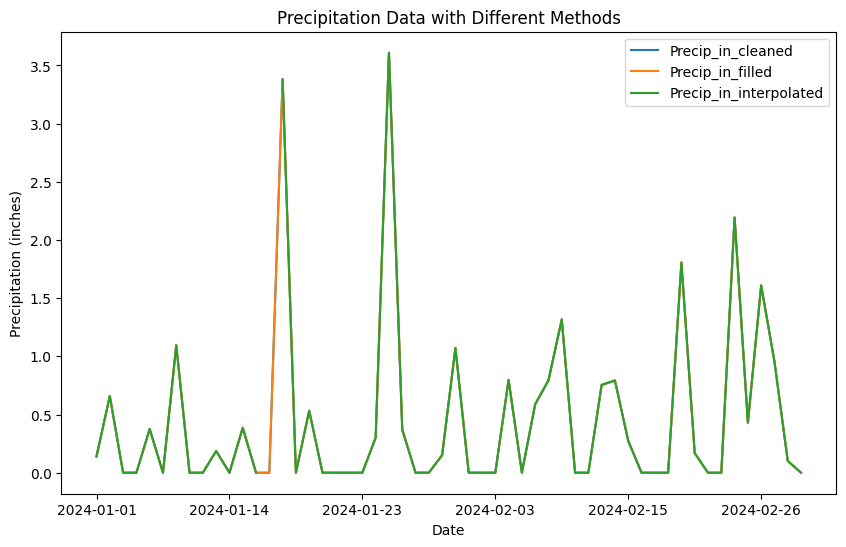

In [14]:
# create a plot with df.plot() with the cleaned, filled, and interpolated precipitation data 
rainfall_methods.plot(figsize=(10,6), title='Precipitation Data with Different Methods', ylabel='Precipitation (inches)', xlabel='Date')


<Axes: title={'center': 'Streamflow Data with Different Methods'}, xlabel='Date', ylabel='Streamflow (cfs)'>

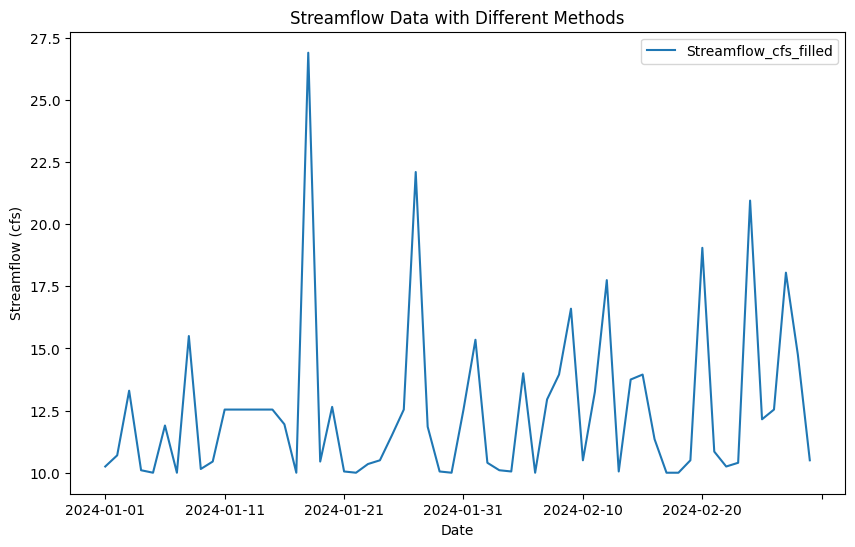

In [15]:
# create a plot with df.plot() with the cleaned, filled, and interpolated streamflow data
streamflow_methods.plot(figsize=(10,6), title='Streamflow Data with Different Methods', ylabel='Streamflow (cfs)', xlabel='Date')  


## Task 7: Combining DataFrames

From the plots above, choose your most representative gap filling dataframe for rainfall and streamflow, and combine them into a rain_flow_df DataFrame.

In [19]:
# create a dataframe combining filled precipitation and streamflow data
combined_filled = pd.DataFrame({
    'Precip_in_filled': Rainfall_mm_filled['Precip_in'],
    'Streamflow_cfs_filled': streamflow_cfs_filled['Streamflow_cfs']
})
combined_filled.head()

,Precip_in_filled,Streamflow_cfs_filled
0,0.140280,10.25
1,0.659018,10.70
2,0.000000,13.30
3,0.000000,10.10
4,0.375729,10.00


## Task 8: Calculate the monthly statistics of the rainfall and discharge

Calculate the monthly total, mean daily (for each month), and the maximum (for each month) rainfall and flow. 

In [16]:
# calculate the monthly total, mean daily for each month, and maximum for each month for streamflow data
streamflow_monthly = streamflow_cfs_cleaned.copy()
streamflow_monthly['Date'] = pd.to_datetime(streamflow_monthly['Date'])
streamflow_monthly.set_index('Date', inplace=True)
streamflow_monthly_total = streamflow_monthly.resample('M').sum()
streamflow_monthly_mean = streamflow_monthly.resample('M').mean()
streamflow_monthly_max = streamflow_monthly.resample('M').max() 
# show the first 5 rows of each of the monthly data sets
print("Monthly Total Streamflow:")
print(streamflow_monthly_total.head())
print("\nMonthly Mean Streamflow:")
print(streamflow_monthly_mean.head())
print("\nMonthly Max Streamflow:")
print(streamflow_monthly_max.head())  

Monthly Total Streamflow:
           Streamflow_cfs
Date                     
2024-01-31          290.7
2024-02-29         361.45

Monthly Mean Streamflow:
           Streamflow_cfs
Date                     
2024-01-31        12.1125
2024-02-29      12.908929

Monthly Max Streamflow:
           Streamflow_cfs
Date                     
2024-01-31           26.9
2024-02-29          20.95


/scratch/local/u1589214/865469/ipykernel_2864645/1044543308.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streamflow_monthly_total = streamflow_monthly.resample('M').sum()
/scratch/local/u1589214/865469/ipykernel_2864645/1044543308.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streamflow_monthly_mean = streamflow_monthly.resample('M').mean()
/scratch/local/u1589214/865469/ipykernel_2864645/1044543308.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streamflow_monthly_max = streamflow_monthly.resample('M').max()


In [22]:
# calculate the monthly total, mean daily for each month, and maximum for each month for precipitation data
rainfall_monthly = Rainfall_mm_cleaned.copy()
rainfall_monthly['Date'] = pd.to_datetime(rainfall_monthly['Date'])
rainfall_monthly.set_index('Date', inplace=True)
rainfall_monthly_total = rainfall_monthly.resample('M').sum()
rainfall_monthly_mean = rainfall_monthly.resample('M').mean()
rainfall_monthly_max = rainfall_monthly.resample('M').max()
# show the first 5 rows of each of the monthly data sets
print("Monthly Total Precipitation:")
print(rainfall_monthly_total.head())
print("\nMonthly Mean Precipitation:")
print(rainfall_monthly_mean.head())
print("\nMonthly Max Precipitation:")
print(rainfall_monthly_max.head())  


Monthly Total Precipitation:
            Precip_in
Date                 
2024-01-31  12.261777
2024-02-29  12.581229

Monthly Mean Precipitation:
            Precip_in
Date                 
2024-01-31   0.437921
2024-02-29   0.483893

Monthly Max Precipitation:
            Precip_in
Date                 
2024-01-31   3.609354
2024-02-29   2.193069


/scratch/local/u1589214/865469/ipykernel_2864645/2919713905.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rainfall_monthly_total = rainfall_monthly.resample('M').sum()
/scratch/local/u1589214/865469/ipykernel_2864645/2919713905.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rainfall_monthly_mean = rainfall_monthly.resample('M').mean()
/scratch/local/u1589214/865469/ipykernel_2864645/2919713905.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rainfall_monthly_max = rainfall_monthly.resample('M').max()


## Task 9: Data Corrections

We want to put the data into a streamflow model, but it requires precipitation to be in mm and streamflow to be in CMS (cubic meters per second). Create a new dataframe called rain_flow_SI_df that converts the previous dataframe to SI units.

In [17]:
# convert precipitation data from inches to millimeters and streamflow data from cfs to cms
rainfall_mm_converted = Rainfall_mm_cleaned.copy()
rainfall_mm_converted['Precip_mm'] = rainfall_mm_converted['Precip_in'] * 25.4
streamflow_cfs_converted = streamflow_cfs_cleaned.copy()
streamflow_cfs_converted['Streamflow_cms'] = streamflow_cfs_converted['Streamflow_cfs'] * 0.0283168
# show the first 5 rows of the converted data sets
print("Converted Rainfall Data (mm):")
print(rainfall_mm_converted.head())
print("\nConverted Streamflow Data (cms):")
print(streamflow_cfs_converted.head())


Converted Rainfall Data (mm):
         Date  Precip_in  Precip_mm
0  2024-01-01   0.140280   3.563120
1  2024-01-02   0.659018  16.739058
2  2024-01-03   0.000000   0.000000
3  2024-01-04   0.000000   0.000000
4  2024-01-05   0.375729   9.543520

Converted Streamflow Data (cms):
         Date Streamflow_cfs Streamflow_cms
0  2024-01-01          10.25       0.290247
1  2024-01-02           10.7        0.30299
2  2024-01-03           13.3       0.376613
3  2024-01-04           10.1          0.286
4  2024-01-05           10.0       0.283168


## Task 10: Event diagnostics

A key element of hydroinformatics is to identify key events and learn from them. Here, we have two tasks.
* Create a new column and programatically label each day as 'Dry', 'Light Rain', or 'Heavy Rain' based on the precipitaiton colum.
* From our rain_flow_SI_df, create a new Pandas DataFrame called storm_df that programatically selects the streamflow and precipitation data for 5 days before and after the peak flow event.

In [20]:
# for the rainfall data, create a new column that categorizes the precipitation into 'Low', 'Medium', and 'High' based on the following thresholds: Low (< 5 mm), Medium (5-15 mm), High (> 15 mm)
rainfall_mm_converted['Precip_Category'] = pd.cut(rainfall_mm_converted['Precip_mm'], bins=[-float('inf'), 5, 15, float('inf')], labels=['Low', 'Medium', 'High'])
# show the first 5 rows of the data set with the new category column
print("Rainfall Data with Precipitation Categories:")
print(rainfall_mm_converted.head())


Rainfall Data with Precipitation Categories:
         Date  Precip_in  Precip_mm Precip_Category
0  2024-01-01   0.140280   3.563120             Low
1  2024-01-02   0.659018  16.739058            High
2  2024-01-03   0.000000   0.000000             Low
3  2024-01-04   0.000000   0.000000             Low
4  2024-01-05   0.375729   9.543520          Medium


## Task 11: Quick Data Visualziation

Use the pandas plot function to conduct a quick visualization of precipitation and streamflow. Do they seem coorelated? Any glaring errors?

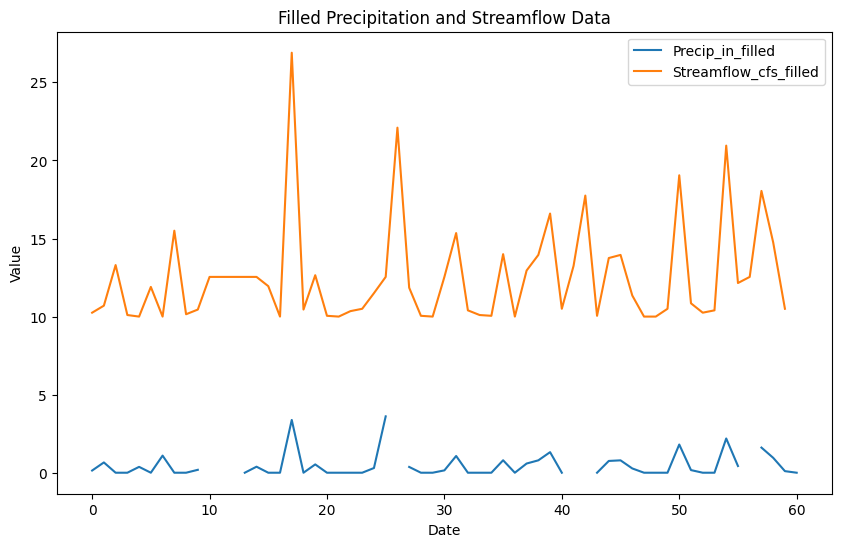

In [21]:
# plot data frame combined_filled with df.plot() showing both the filled precipitation and streamflow data on the same plot with different colors and a legend
from matplotlib.pyplot import show


combined_filled.plot(figsize=(10,6), title='Filled Precipitation and Streamflow Data', ylabel='Value', xlabel='Date')
show()